In [1]:
from google.colab import files
datafiles = files.upload()

Saving HR_Employee_Attrition_Data.csv to HR_Employee_Attrition_Data (3).csv


In [0]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold,StratifiedKFold
import numpy as np
import seaborn as sns

In [0]:
train = pd.read_csv('HR_Employee_Attrition_Data.csv')

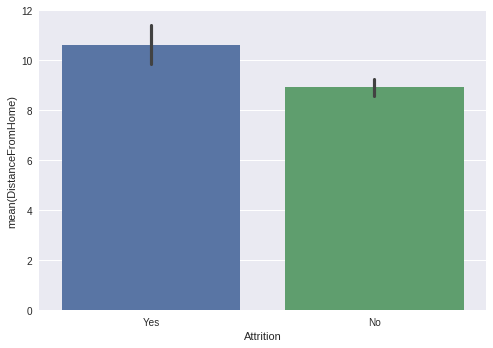

In [96]:
sns.barplot(x='Attrition', y ='DistanceFromHome',data=train)

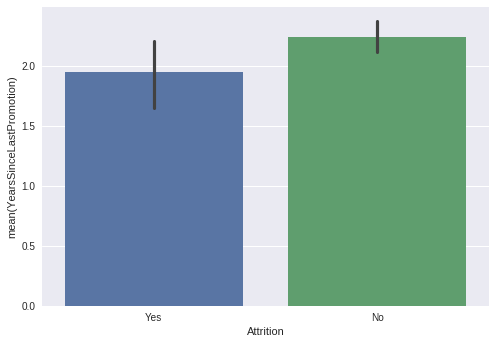

In [97]:
sns.barplot(x='Attrition', y ='YearsSinceLastPromotion',data=train)

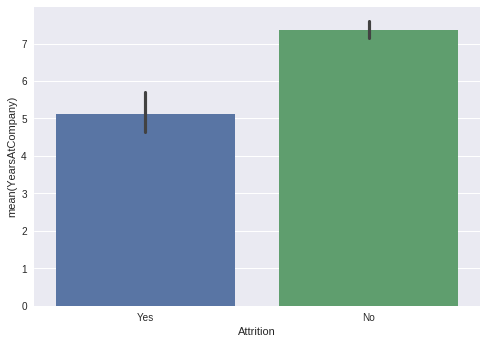

In [98]:
sns.barplot(x='Attrition', y ='YearsAtCompany',data=train)

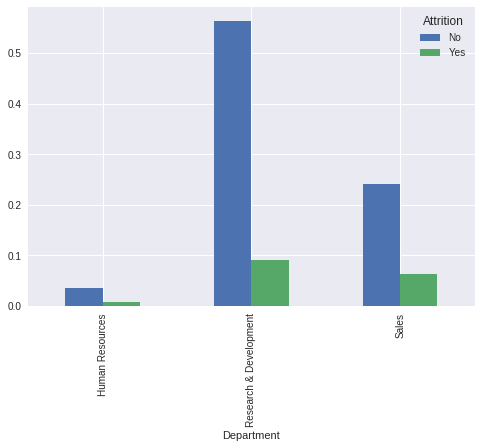

In [99]:
pd.crosstab(train['Department'],train['Attrition'], normalize=True).plot(kind='bar')

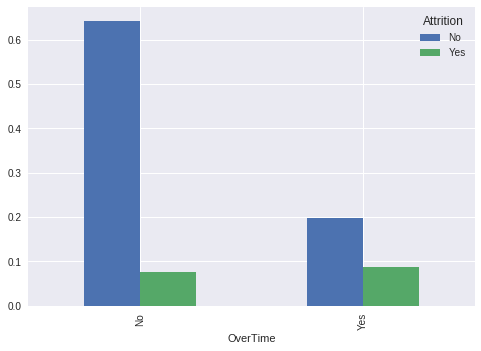

In [100]:
pd.crosstab(train['OverTime'],train['Attrition'], normalize=True).plot(kind='bar')

Overall 28% of the employees are putting overtime. The percentage of attrition amongst those putting in overtime is close to 44%  vs 11% for those not putting in overtime. Thus Overtime is contributing towards attrition.

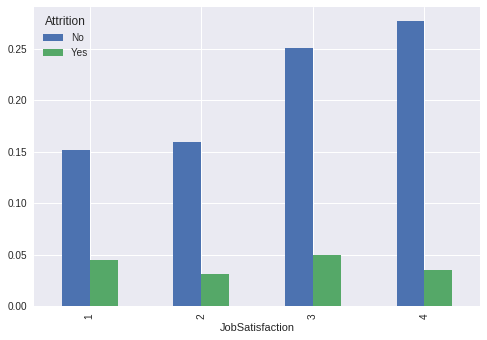

In [101]:
pd.crosstab(train['JobSatisfaction'],train['Attrition'], normalize=True).plot(kind='bar')

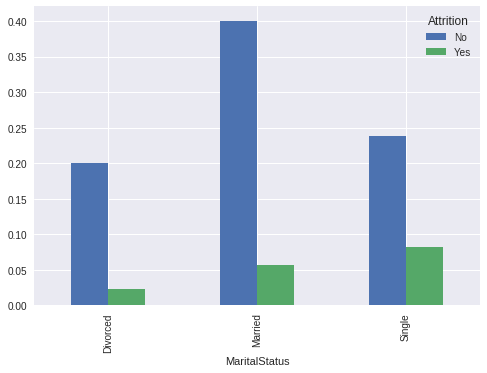

In [102]:
pd.crosstab(train['MaritalStatus'],train['Attrition'], normalize=True).plot(kind='bar')

Single are more probable to leave the company as seen than a married person.

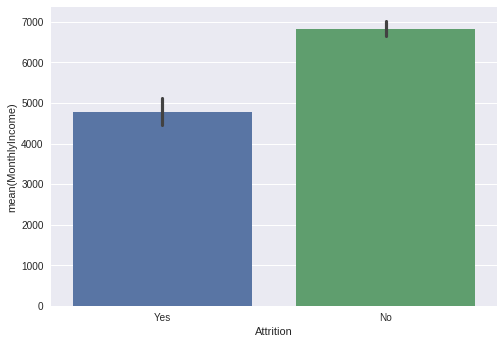

In [103]:
sns.barplot(x='Attrition', y ='MonthlyIncome',data=train)

Income is also the one main factor that drives attrition.

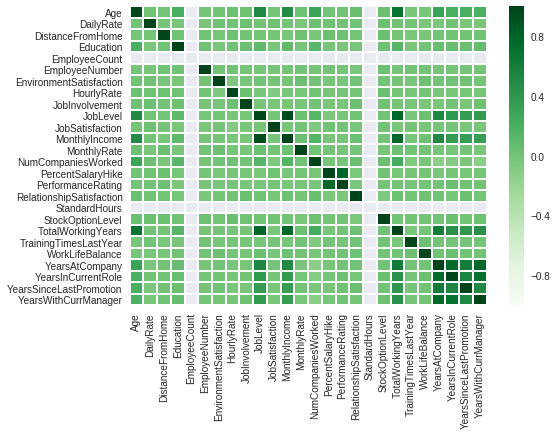

In [104]:
sns.heatmap(train.corr(), linewidths=1, linecolor='white', cmap='Greens')

In [105]:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [0]:
train_cop = train.copy()

In [0]:
train_cop['Attrition'] = pd.factorize(train_cop['Attrition'])[0]
train_cop['BusinessTravel'] = pd.factorize(train_cop['BusinessTravel'])[0]
train_cop['Department'] = pd.factorize(train_cop['Department'])[0]
train_cop['EducationField'] = pd.factorize(train_cop['EducationField'])[0]
train_cop['Gender'] = pd.factorize(train_cop['Gender'])[0]
train_cop['JobRole'] = pd.factorize(train_cop['JobRole'])[0]
train_cop['MaritalStatus'] = pd.factorize(train_cop['MaritalStatus'])[0]
train_cop['Over18'] = pd.factorize(train_cop['Over18'])[0]
train_cop['OverTime'] = pd.factorize(train_cop['OverTime'])[0]

In [0]:
X = train_cop.drop(['Attrition'],axis=1)
y = train_cop['Attrition']

In [0]:
from sklearn.linear_model import Ridge

In [110]:
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [111]:
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [113]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 0.004 * X0 + -0.001 * X1 + 0.0 * X2 + 0.071 * X3 + -0.004 * X4 + -0.001 * X5 + -0.016 * X6 + 0.0 * X7 + 0.0 * X8 + 0.04 * X9 + -0.038 * X10 + 0.0 * X11 + 0.06 * X12 + 0.026 * X13 + -0.014 * X14 + 0.037 * X15 + 0.056 * X16 + 0.0 * X17 + -0.0 * X18 + -0.017 * X19 + 0.0 * X20 + 0.211 * X21 + 0.005 * X22 + -0.034 * X23 + 0.022 * X24 + 0.0 * X25 + 0.024 * X26 + 0.003 * X27 + 0.012 * X28 + 0.03 * X29 + -0.006 * X30 + 0.01 * X31 + -0.011 * X32 + 0.01 * X33


In [0]:
#looking at above equation the negative ones are to be ommited according to ridge regreaaion is not importat features

In [0]:
data_need = train.drop(['BusinessTravel','DistanceFromHome','Education','EducationField','Gender','JobRole','MonthlyRate','NumCompaniesWorked','Over18','PerformanceRating','YearsAtCompany','YearsSinceLastPromotion'],axis=1)

In [116]:
data_need.head()

,Age,Attrition,DailyRate,Department,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,1102,Sales,1,1,2,94,3,2,...,Yes,11,1,80,0,8,0,1,4,5
1,49,No,279,Research & Development,1,2,3,61,2,2,...,No,23,4,80,1,10,3,3,7,7
2,37,Yes,1373,Research & Development,1,3,4,92,2,1,...,Yes,15,2,80,0,7,3,3,0,0
3,33,No,1392,Research & Development,1,4,4,56,3,1,...,Yes,11,3,80,0,8,3,3,7,0
4,27,No,591,Research & Development,1,5,1,40,3,1,...,No,12,4,80,1,6,3,3,2,2


In [117]:
cat_var = data_need.dtypes.loc[data_need.dtypes=='object'].index
cat_var

Index(['Attrition', 'Department', 'MaritalStatus', 'OverTime'], dtype='object')

In [0]:
data = data_need.copy()

In [0]:
data = data.drop(['Attrition'],axis=1)

In [0]:
encoded=pd.get_dummies(data)

In [121]:
encoded.head()

,Age,DailyRate,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsInCurrentRole,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,1,2,94,3,2,4,5993,...,4,5,0,0,1,0,0,1,0,1
1,49,279,1,2,3,61,2,2,2,5130,...,7,7,0,1,0,0,1,0,1,0
2,37,1373,1,3,4,92,2,1,3,2090,...,0,0,0,1,0,0,0,1,0,1
3,33,1392,1,4,4,56,3,1,3,2909,...,7,0,0,1,0,0,1,0,0,1
4,27,591,1,5,1,40,3,1,2,3468,...,2,2,0,1,0,0,1,0,1,0


In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500)

In [0]:
X = encoded

In [0]:
y = train_cop['Attrition']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
parameter_space = {
    'hidden_layer_sizes': [(14,14,14), (14,28,14), (28,)],
    'activation': [ 'relu','tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [127]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(14, 14, 14), (14, 28, 14), (28,)], 'activation': ['relu', 'tanh'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [128]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (28,), 'learning_rate': 'constant', 'solver': 'sgd'}


In [129]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.840 (+/-0.001) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (14, 14, 14), 'learning_rate': 'constant', 'solver': 'sgd'}
0.768 (+/-0.120) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (14, 14, 14), 'learning_rate': 'constant', 'solver': 'adam'}
0.840 (+/-0.001) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (14, 14, 14), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.808 (+/-0.071) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (14, 14, 14), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.841 (+/-0.001) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (14, 28, 14), 'learning_rate': 'constant', 'solver': 'sgd'}
0.798 (+/-0.041) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (14, 28, 14), 'learning_rate': 'constant', 'solver': 'adam'}
0.840 (+/-0.001) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (14, 28, 14), 'learning_rate': 'adaptive', 'solver': 'sg

In [0]:
y_true, y_pred = y_test , clf.predict(X_test)

In [131]:
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.84      1.00      0.91       737

   micro avg       0.84      0.84      0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.70      0.84      0.76       882



In [0]:
from sklearn.ensemble import  RandomForestClassifier

In [0]:
rf = RandomForestClassifier()

In [0]:
param_grid_rf = {'n_estimators':[100,200,500], 'max_depth':[3,5,7,9]}

In [0]:
best_model_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='roc_auc',  cv=5)

In [136]:
best_model_rf.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [137]:
print('Best parameters found:\n', best_model_rf.best_params_)

Best parameters found:
 {'max_depth': 9, 'n_estimators': 500}


In [0]:
y_true_rf, y_pred_rf = y_test , best_model_rf.predict(X_test)

In [139]:
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true_rf, y_pred_rf))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.48      0.64       145
           1       0.91      1.00      0.95       737

   micro avg       0.91      0.91      0.91       882
   macro avg       0.95      0.74      0.80       882
weighted avg       0.92      0.91      0.90       882



In [0]:
train=pd.concat([X_train,y_train],axis=1)
test=X_test


In [161]:
train.shape,test.shape

((2058, 28), (882, 27))

In [0]:
ntrain=train.shape[0]
ntest=test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
# kf = StratifiedKFold(n_splits=NFOLDS)
# kf.get_n_splits(train)
# kf = KFold(ntrain,random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)


In [0]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    kfold = KFold(n_splits = 5, random_state = 0)
    for i,(train_index, test_index) in enumerate(kfold.split(train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [0]:
rf_params_1 = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 9,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}
rf_params_2 = {
    'n_jobs': -1,
    'n_estimators': 200,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 7,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}
rf_params_3 = {
    'n_jobs': -1,
    'n_estimators': 1000,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 9,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

nn_params_1= {
    'hidden_layer_sizes':(14,28,14 ), 
    'activation':'relu', 
    'solver':"sgd",
    'alpha': 0.05,
    'learning_rate': 'adaptive'
    }
nn_params_2= {
    'hidden_layer_sizes':(28 ,), 
    'activation':'relu', 
    'solver':"sgd",
    'alpha': 0.05,
    'learning_rate': 'adaptive'
    }



In [0]:
rf_1 = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params_1)
rf_2 = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params_2)
rf_3 = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params_3)
nn_1= SklearnHelper(clf=MLPClassifier,seed=SEED,params=nn_params_1)
nn_2= SklearnHelper(clf=MLPClassifier,seed=SEED,params=nn_params_2)

In [0]:
y_train = train['Attrition'].ravel()
train = train.drop(['Attrition'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data



In [0]:
rf_oof_train_1, rf_oof_test_1 = get_oof(rf_1, x_train, y_train, x_test) #RF
rf_oof_train_2, rf_oof_test_2 = get_oof(rf_2, x_train, y_train, x_test) # RF
rf_oof_train_3, rf_oof_test_3 = get_oof(rf_3, x_train, y_train, x_test) # RF
nn_oof_train_1, nn_oof_test_1 = get_oof(nn_1, x_train, y_train, x_test) # NN
nn_oof_train_2, nn_oof_test_2 = get_oof(nn_2, x_train, y_train, x_test) # NN

In [168]:
base_predictions_train = pd.DataFrame( {'RandomForest_1': rf_oof_train_1.ravel(),'RandomForest_2': rf_oof_train_2.ravel(),'RandomForest_3': rf_oof_train_3.ravel(),
     'NeuralNetwork_1': nn_oof_train_1.ravel(),'NeuralNetwork_2': nn_oof_train_2.ravel()})
base_predictions_train.head()

,NeuralNetwork_1,NeuralNetwork_2,RandomForest_1,RandomForest_2,RandomForest_3
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


In [0]:
x_train = np.concatenate((rf_oof_train_1,rf_oof_train_2,rf_oof_train_3,nn_oof_train_1,nn_oof_train_2), axis=1)
x_test = np.concatenate((rf_oof_test_1,rf_oof_test_2,rf_oof_test_3, nn_oof_test_1,nn_oof_test_2), axis=1)

In [0]:
from xgboost import XGBClassifier

clf_ens = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10).fit(x_train, y_train)



In [0]:
 y_pred_ens = clf_ens.predict(x_test)

In [175]:
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_pred_ens, y_test))

Results on the test set:
              precision    recall  f1-score   support

           0       0.42      0.88      0.57        69
           1       0.99      0.90      0.94       813

   micro avg       0.90      0.90      0.90       882
   macro avg       0.70      0.89      0.76       882
weighted avg       0.94      0.90      0.91       882



The ensmeble method is marginally performing less than RF but better than NN. 